In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

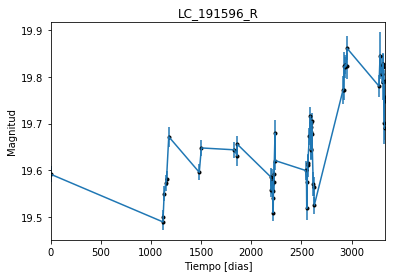

In [2]:
data = np.genfromtxt('LC_191596_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_191596_R')
plt.savefig("LC_191596_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

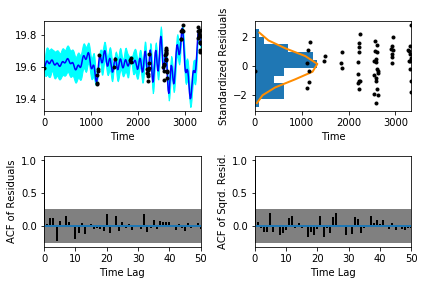

In [5]:
sample.assess_fit()

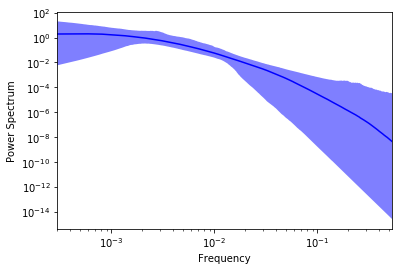

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

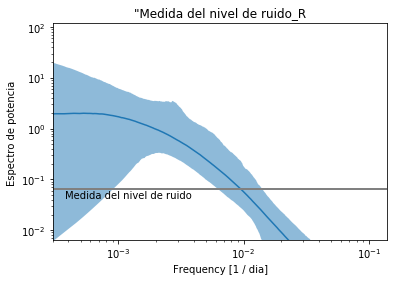

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_191596_R')
plt.title('"Medida del nivel de ruido_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_191596_R')

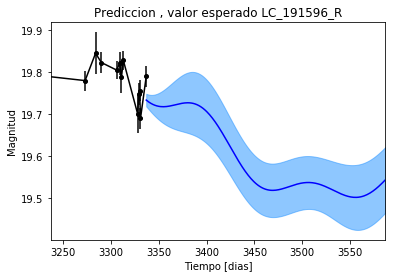

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_191596_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_191596_R')

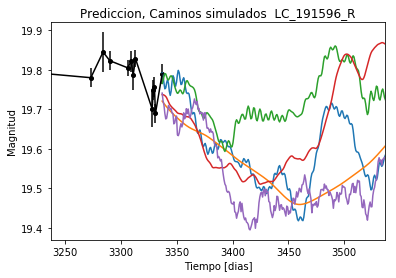

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_191596_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


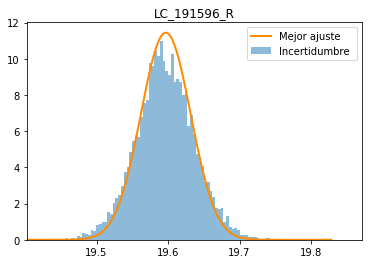

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_191596_R')
plt.savefig("Mejor_ajuste_LC_191596_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_191596_R')

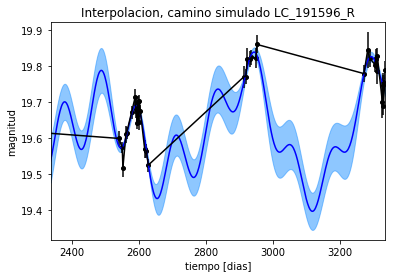

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_191596_R')

Text(0.5,1,'Interpolacion, camino simulado LC_191596_R')

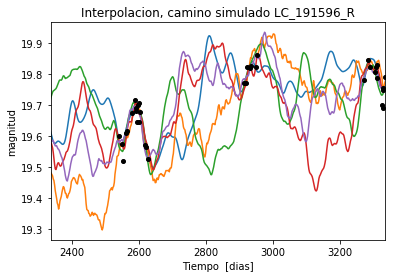

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_191596_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1045.24299356
Median: 0.0250334526797
Standard deviation: 0.209705400677
68% credibility interval: [ 0.00229693  0.25034744]
95% credibility interval: [  4.85065033e-04   8.25963540e-01]
99% credibility interval: [  3.30475487e-04   1.00254759e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1018.05369182
Median: 0.00613799648457
Standard deviation: 0.101126772587
68% credibility interval: [ 0.00098648  0.06745365]
95% credibility interval: [ 0.00039169  0.36423025]
99% credibility interval: [  3.20834476e-04   6.15558755e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 549.737697999
Median: 0.0475988974757
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1258.55294488
Median: 121.084781644
Standard deviation: 1.65920737324
68% credibility interval: [ 119.22933795  122.30836403]
95% credibility interval: [ 116.70735359  122.99661905]
99% credibility interval: [ 114.73558374  123.40710935]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 496.916939954
Median: 1.10781082142
Standard deviation: 2.41919214479
68% credibility interval: [ 0.17782592  4.60137432]
95% credibility interval: [ 0.03889501  8.52784483]
99% credibility interval: [  0.01429415  11.55204172]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 435.600526063
Median: 1.66551937223
Standard deviation: 11.1250068649
68% credibility interval: [  0.06607958  15.50531116]
95% credibility interval: [  5.60395271e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2177.89995297
Median: 1.38251410121e-19
Standard deviation: 1.78771342812e+115
68% credibility interval: [  9.01159311e-101   4.62440195e+032]
95% credibility interval: [  2.15408378e-256   3.43795369e+062]
99% credibility interval: [  3.53147378e-281   3.48811846e+114]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1857.1422203
Median: 19.6517181873
Standard deviation: 0.0476416473476
68% credibility interval: [ 19.60909393  19.68843208]
95% credibility interval: [ 19.54583802  19.7403258 ]
99% credibility interval: [ 19.49260407  19.80156141]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 668.96110069
Median: 0.0380619946927
Standard deviation: 0.285287525391
68% credibility interval: [ 0.          0.51206468]
95% credibility interval: [ 0.          0.98395081]
99% credibility interval: [ 0.          1.04542389]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 668.96110069
Median: 0.0380619946927
Standard deviation: 0.285287525391
68% credibility interval: [ 0.          0.51206468]
95% credibility interval: [ 0.          0.98395081]
99% credibility interval: [ 0.          1.04542389]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 714.587729598
Median: 0.0
Standard deviation: 0.00122658439349
68% credi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1258.55294488
Median: 121.084781644
Standard deviation: 1.65920737324
68% credibility interval: [ 119.22933795  122.30836403]
95% credibility interval: [ 116.70735359  122.99661905]
99% credibility interval: [ 114.73558374  123.40710935]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 888.646794889
Median: 0.0132538635995
Standard deviation: 0.0107102152784
68% credibility interval: [ 0.00831029  0.02399065]
95% credibility interval: [ 0.00588196  0.04376642]
99% credibility interval: [ 0.0047215   0.06436076]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 910.844083452
Median: 1.11391895749
Standard deviation: 0.204809082245
68% credibility interval: [ 0.93070279  1.33038269]
95% credibility interval: [ 0.7817164   1.58452239]
99% credibility interval: [ 0.68476522  1.78323923]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 372.860262398
Median: 0.00209574669034
Standard deviation: 0.205957403754
68% credibility interval: [  4.10762201e-36   5.50083106e-02]
95% credibility interval: [  1.81293012e-65   4.95528682e-01]
99% credibility interval: [  1.35469648e-119   1.46170723e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1045.24299356
Median: (-0.157289822065-2.52807277484j)
Standard deviation: 2.2246853128
68% credibility interval: [-1.57297934-1.4615811j  -0.01443203-3.21522613j]
95% credibility interval: [ -5.18968198e+00+0.j          -3.04775349e-03-0.06003445j]
99% credibility interval: [ -6.29919226e+00+0.j          -2.07643873e-03-3.70735659j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1018.05369182
Median: (-0.0385661693274+0.243591663632j)
Standard deviation: 1.90179882451
68% credibility interval: [-0.42382379+4.84884558j -0.00619822+0.07066307j]
95% credibility interval: [-2.28852614+0.20222337j -0.00246105+6.34847891j]
99% credibility interval: [ -3.86766973e+00+3.17676942j  -2.01586247e-03+0.j        ]
Posterior summa